# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\random_forest\../../src\datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Ship_by_

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'616', '108', 'CI-', '65Z', 'Y-3', '094', 'SOB', '529', '217', 'VO-', 'HIG', '430', '07U', 'MAS', '396', 'ODO', '325', '21Y', '64V', '370', '736', '02Q', '638', '34S', '8Y-', '614', '31U', '361', '92Y', '061', '15S', 'CHW', '44Y', '40T', '265', '705', '23W', '6-2', 'LAC', 'O-T', '17V', '756', '79R', '016', 'OWS', 'BL-', '552', '36X', 'X-L', '01W', 'JAG', '092', '55Z', '821', 'PB-', '879', '817', '34Y', '80V', '278', '43Z', '10Y', '32S', 'B-0', '60U', 'KWS', 'HEA', '06U', 'DPI', '61T', '99X', '44V', '225', '19T', '44T', '27P', '16Z', '245', '637', 'SUP', '792', 'P-0', '43W', '590', 'H-T', '91V', '309', 'TW-', 'UP-', '29Y', '477', '315', '13U', '912', 'JUR', '564', '18W', '606', '511', '14T', 'IDA', 'BBJ', '5Z-', '782', 'TA-', '43S', '400', '54W', '77Y', '374', '905', 'MIK', '332', '29Z', 'ROC', '12T', 'S-0', '452', '609', '946', '03X', 'FR-', 'GRK', '810', '0-0', '197', '74Z', 'AUG', '481', 'GK-', '088', '62T', '765', '799', '878', '19X', 'TM-',

In [6]:
# # display the highest order quantity customers 
ph.highest_customs()

    CustomerCode  OrderQuantity
83           FRE      608219751
274          UND      523318600
3            ALB      432089700
160          MOM      369309843
286          WOE      280930440
..           ...            ...
175          OCI           1200
271          ULT           1000
276          USU           1000
111          HOL           1000
162          MOU            200

[295 rows x 2 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('FRE'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

FRE


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


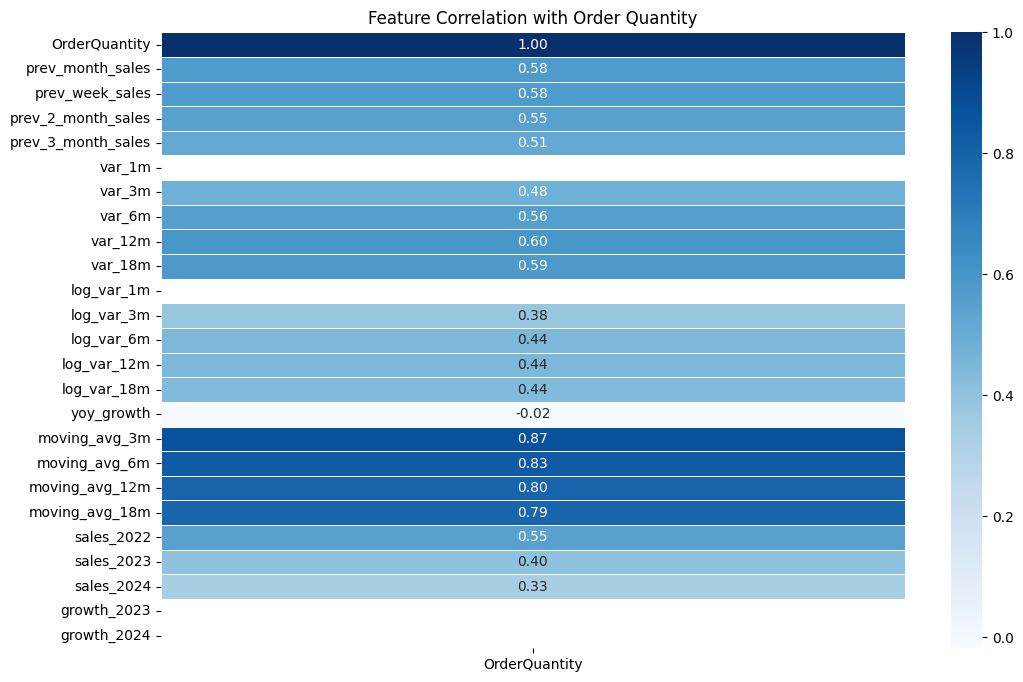

In [8]:
ph.feature_importance(custom_code_df)

In [9]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
FRE-005-0015Y 48    FRE-005-0015Y         475000  4.034252
FRE-005-0016Z 104   FRE-005-0016Z         210000  3.438802
FRE-005-0019Z 169   FRE-005-0019Z         420000  3.244338
FRE-005-0024Y 238   FRE-005-0024Y         465000  3.440847
FRE-005-0045Z 418   FRE-005-0045Z        1440000  3.292242
FRE-005-0049Z 497   FRE-005-0049Z         720000  3.850058
FRE-005-0076Z 1067  FRE-005-0076Z         170000  3.678452
FRE-005-0081Z 1197  FRE-005-0081Z         375000  3.783414
FRE-005-0087Y 1397  FRE-005-0087Y         202500  3.417696
FRE-005-0090Z 1495  FRE-005-0090Z         315000  3.110541
FRE-005-0105X 1919  FRE-005-0105X         262500  3.215675
FRE-005-0111Y 2007  FRE-005-0111Y         457500  3.224130
FRE-005-0112W 2025  FRE-005-0112W         532500  3.190349
FRE-005-0115X 2054  FRE-005-0115X         150000  3.566041
FRE

C:\Users\44777\AppData\Local\Temp\ipykernel_14256\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14256\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14256\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14256\1363007664.py:7: RuntimeWarning: Preci

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)


In [11]:
# all products order quants for defined customer list (2022-2025)
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [12]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()


Train Shape: (3667, 434), Validation Shape: (917, 434)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [13]:
# the top 10 (or change) products by total actual order quantity
top_products = df.groupby('ProductNumber')['OrderQuantity'].sum().nlargest(5)

# extract top product code rows from the original df
top_prods_df = df[df['ProductNumber'].isin(top_products.index)]

# Extract top product numbers
top_product_numbers = top_products.index.tolist()  # List of top product numbers

top_prods_df.head()

unique_order_years = custom_code_df['order_year'].unique()
print(unique_order_years)

[2022 2023 2021 2024 2025 2020]


In [14]:
print("Number of samples in top_prods_df:", len(top_prods_df))

Number of samples in top_prods_df: 159


In [15]:
# define features and target
features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
tp_X = top_prods_df[features]  # Features from top products
tp_y = top_prods_df[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
tp_X_train, tp_X_val, tp_y_train, tp_y_val = train_test_split(tp_X, tp_y, test_size=0.2, random_state=42)

# Transform the features
tp_X_train_transformed = preprocessor.fit_transform(tp_X_train)
tp_X_val_transformed = preprocessor.transform(tp_X_val)

# Output the shape
print(f"Train Shape: {tp_X_train_transformed.shape}, Validation Shape: {tp_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")


Train Shape: (127, 25), Validation Shape: (32, 25)
Feature processing for top products completed successfully!


In [16]:
from sklearn.ensemble import RandomForestRegressor
from model_utils import *

In [17]:
# train the model with scaled features (Random Forest Regressor)
rf = RandomForestRegressor()
rf_params = find_best_hyperparameters(rf, param_grids(rf.__class__.__name__), X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [ ]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(rf, X_train_scaled, y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(rf, X_val_scaled, y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Mean Absolute Error (MAE): 5685.5635
Mean Squared Error (MSE): 243236705.4644
Root Mean Squared Error (RMSE): 15596.0478
R-squared (R²): 0.9861
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Mean Absolute Error (MAE): 14788.7204
Mean Squared Error (MSE): 1986425980.1777
Root Mean Squared Error (RMSE): 44569.3390
R-squared (R²): 0.9079
--------------------------------------------


In [ ]:
# train the model with scaled features (Random Forest Regressor) - TOTAL CUSTOM PRODUCTS IMPLEMENTATION
total_rf = RandomForestRegressor()
total_rf_params = find_best_hyperparameters(total_rf, param_grids(total_rf.__class__.__name__), total_X_train_transformed, total_y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForestRegressor Best Parameters: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
total_rf = RandomForestRegressor(**total_rf_params)
total_rf.fit(total_X_train_transformed, total_y_train)
total_y_pred_rf = total_rf.predict(total_X_val_transformed)

In [ ]:
print('---------------------- TRAINING PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_train_transformed, total_y_train)
print('--------------------------------------------')

print('---------------------- TEST PERFORMANCE ----------------------')
evaluate_model(total_rf, total_X_val_transformed, total_y_val)
print('--------------------------------------------')

---------------------- TRAINING PERFORMANCE ----------------------
Mean Absolute Error (MAE): 6148.3274
Mean Squared Error (MSE): 274684881.5753
Root Mean Squared Error (RMSE): 16573.6201
R-squared (R²): 0.9843
--------------------------------------------
---------------------- TEST PERFORMANCE ----------------------
Mean Absolute Error (MAE): 15365.2124
Mean Squared Error (MSE): 2063993533.7412
Root Mean Squared Error (RMSE): 45431.1956
R-squared (R²): 0.9043
--------------------------------------------


[82746.25, 156857.75793650796, 16766.345238095244, 54350.58333333335, 337934.6428571429, 50380.80357142857, 151669.27380952385, 102227.42063492062, 86554.24206349207, 44785.57142857142, 105738.33333333331, 89198.51190476191, 75192.73809523808, 350680.2896825397, 90304.28571428571, 66020.83333333331, 79678.59848484848, 185305.83333333337, 101702.17261904763, 70124.32142857142, 9239.916666666666, 61612.440476190495, 198832.29166666663, 131528.92857142858, 293888.5833333333, 30316.996031746035, 155301.30952380953, 663168.1845238096, 127056.28968253966, 178430.89285714287, 59939.99999999999, 475597.38095238095, 216465.7539682539, 30216.535714285717, 94100.58333333334, 25245.71626984127, 71795.95238095238, 153264.38095238098, 73334.88095238095, 133913.6507936508, 18113.86904761905, 8424.315476190475, 49183.85317460317, 7390.452380952381, 31056.0, 63361.60119047618, 67519.78571428571, 135821.59523809527, 560889.0476190476, 27793.333333333325, 191647.39285714284, 100073.33333333334, 319723.74

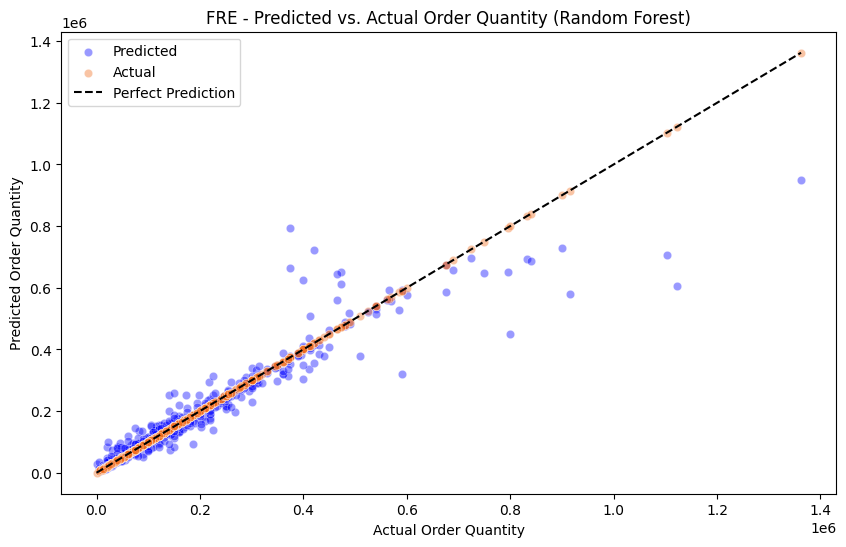

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(y_pred_rf.tolist())

plt.figure(figsize=(10, 6))

# scatter plot, actual vs predicted values
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.4, color='blue', label='Predicted')  # Predicted values in blue

# actual values in red
sns.scatterplot(x=y_val, y=y_val, alpha=0.4, color='#f26d1d', label='Actual')

# reference line for perfect prediction
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='black', label="Perfect Prediction")

plt.xlabel("Actual Order Quantity")
plt.ylabel("Predicted Order Quantity")
plt.title(f"{custom_ref} - Predicted vs. Actual Order Quantity (Random Forest)")
plt.legend()

plt.show()

C:\Users\44777\AppData\Local\Temp\ipykernel_7312\1606837329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))


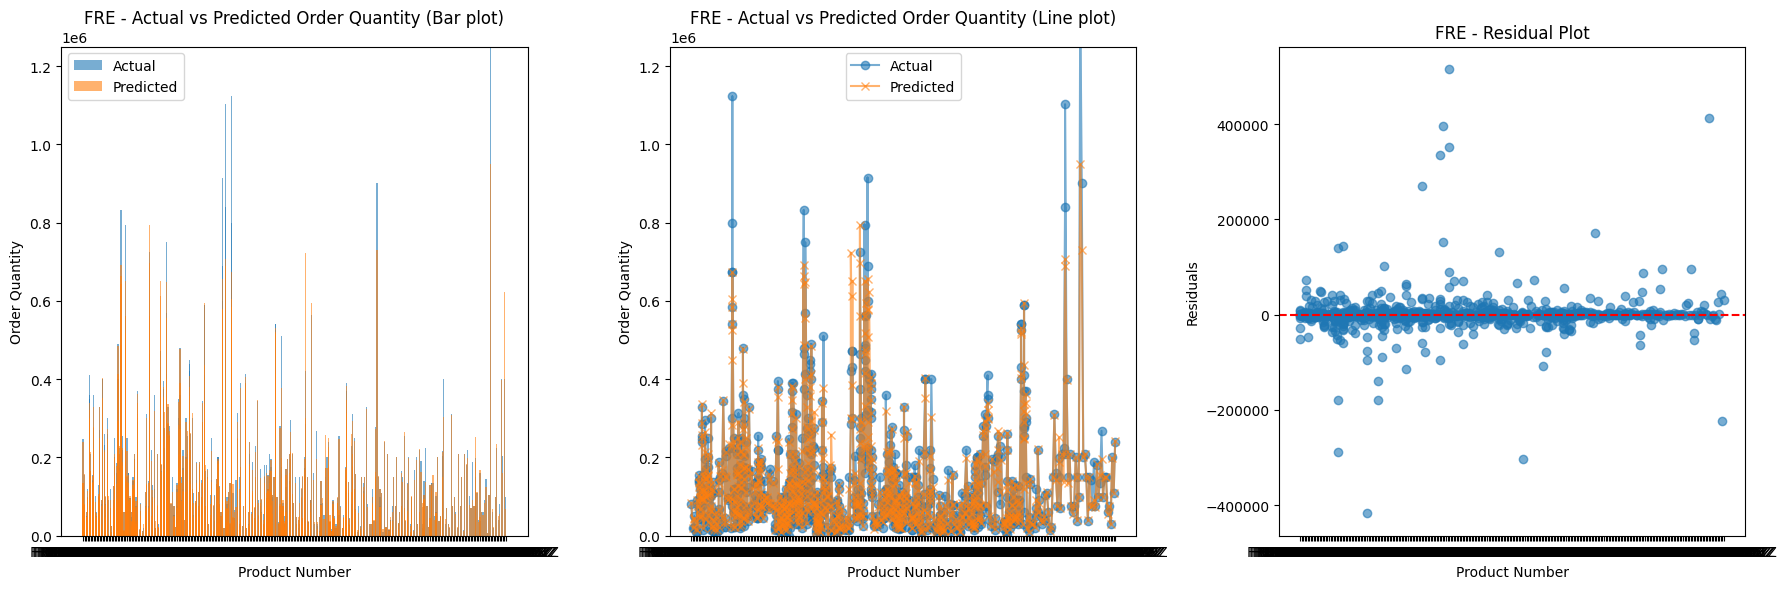

In [ ]:
# Convert order year and month to datetime format
top_prods_df['OrderDate'] = pd.to_datetime(top_prods_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
top_prods_df = top_prods_df.sort_values(by='OrderDate')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6)
axes[0].bar(df.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Bar plot)')
axes[0].set_ylim(0, 1250000)
axes[0].legend()

# Line plot, actual and predicted values
sorted_indices = df.loc[y_val.index, 'ProductNumber'].argsort()
sorted_products = df.loc[y_val.index, 'ProductNumber'].iloc[sorted_indices]
sorted_actual = y_val.iloc[sorted_indices]
sorted_predicted = y_pred_rf[sorted_indices]

axes[1].plot(sorted_products, sorted_actual, label='Actual', alpha=0.6, marker='o')
axes[1].plot(sorted_products, sorted_predicted, label='Predicted', alpha=0.6, marker='x')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity (Line plot)')
axes[1].set_ylim(0, 1250000)
axes[1].legend()

# Residual plot
residuals = y_val - y_pred_rf
axes[2].scatter(df.loc[y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Product Number')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot')

plt.tight_layout()
plt.show()


In [ ]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [ ]:
# total_y_val.type

In [ ]:
total_y_val.type

AttributeError: 'Series' object has no attribute 'type'

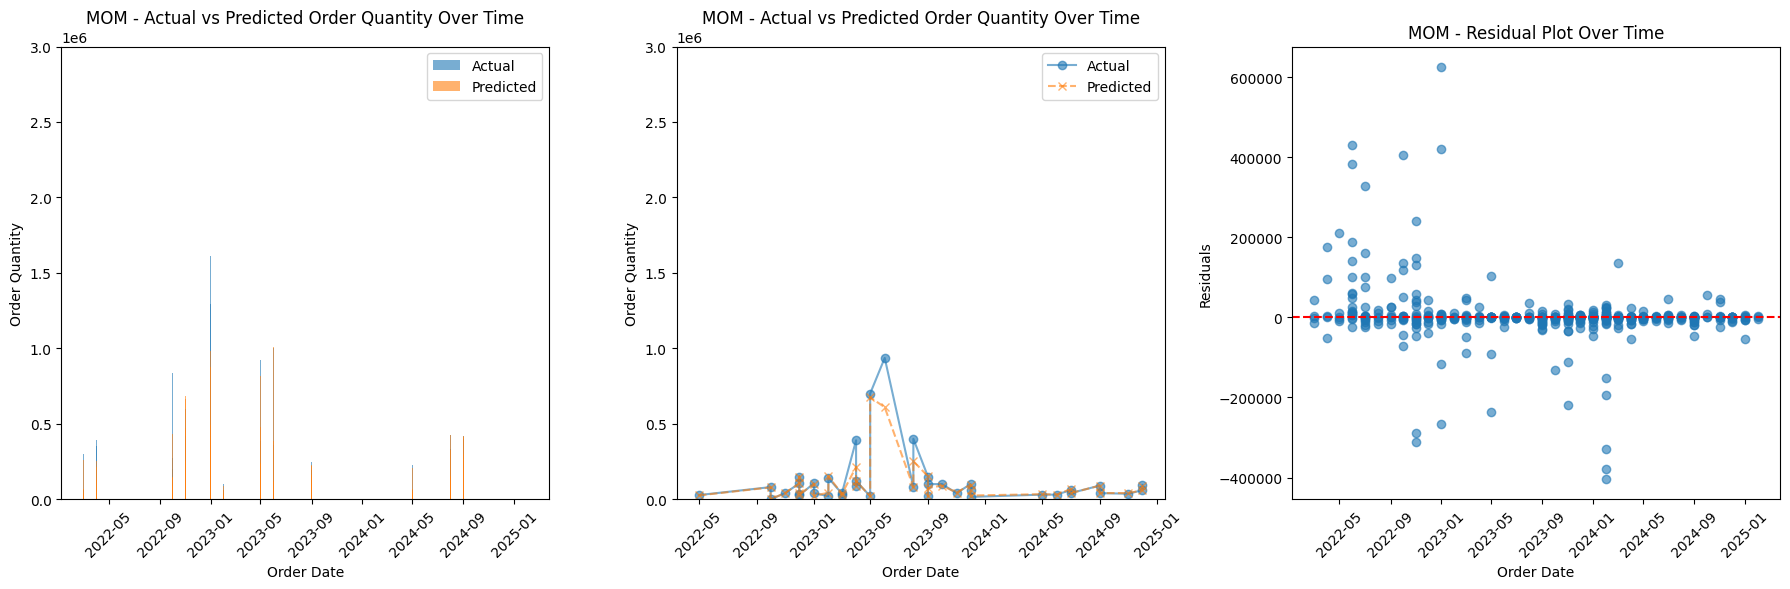

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot, actual and predicted values over time
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[0].set_ylim(0, 3000000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Line plot, actual and predicted values over time
sorted_indices = top_prods_df.loc[tp_y_val.index, 'OrderDate'].argsort()
sorted_dates = top_prods_df.loc[tp_y_val.index, 'OrderDate'].iloc[sorted_indices]
sorted_actual = total_y_val.iloc[sorted_indices]
sorted_predicted = total_y_pred_rf[sorted_indices]

axes[1].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[1].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[1].set_xlabel('Order Date')
axes[1].set_ylabel('Order Quantity')
axes[1].set_title(f'{custom_ref} - Actual vs Predicted Order Quantity Over Time')
axes[1].set_ylim(0, 3000000)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Residual plot over time
residuals = total_y_val - total_y_pred_rf
axes[2].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Order Date')
axes[2].set_ylabel('Residuals')
axes[2].set_title(f'{custom_ref} - Residual Plot Over Time')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# # to see dataframe structure
# customer_total.head()


In [ ]:
# # to see prediction nparray structure
# total_y_pred_rf

In [ ]:
# # Group data by OrderDate and sum the relevant numerical columns
# customer_total = top_prods_df.groupby('OrderDate').sum(numeric_only=True).reset_index()

In [ ]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2656,MOM-TRL-0004Z,2022,1,5,0,0,241.0,126000,110031.53337,110031.53337,...,126000.000000,126000.000000,126000.000000,126000,0,0,-100.0,NaN,0,2022-01-01
2655,MOM-TRL-0003Z,2022,1,5,0,0,241.0,157500,110031.53337,110031.53337,...,157500.000000,157500.000000,157500.000000,157500,0,0,-100.0,NaN,0,2022-01-01
2654,MOM-TRL-0001Z,2022,1,5,0,0,241.0,378000,110031.53337,110031.53337,...,378000.000000,378000.000000,378000.000000,378000,0,0,-100.0,NaN,0,2022-01-01
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,84000.000000,84000.000000,84000.000000,94500,0,0,-100.0,NaN,0,2022-03-01
507,MOM-005-0044Z,2022,3,13,0,0,241.0,27000,18000.00000,18000.00000,...,26166.666667,25285.714286,25285.714286,27000,0,0,-100.0,NaN,25000,2022-03-01


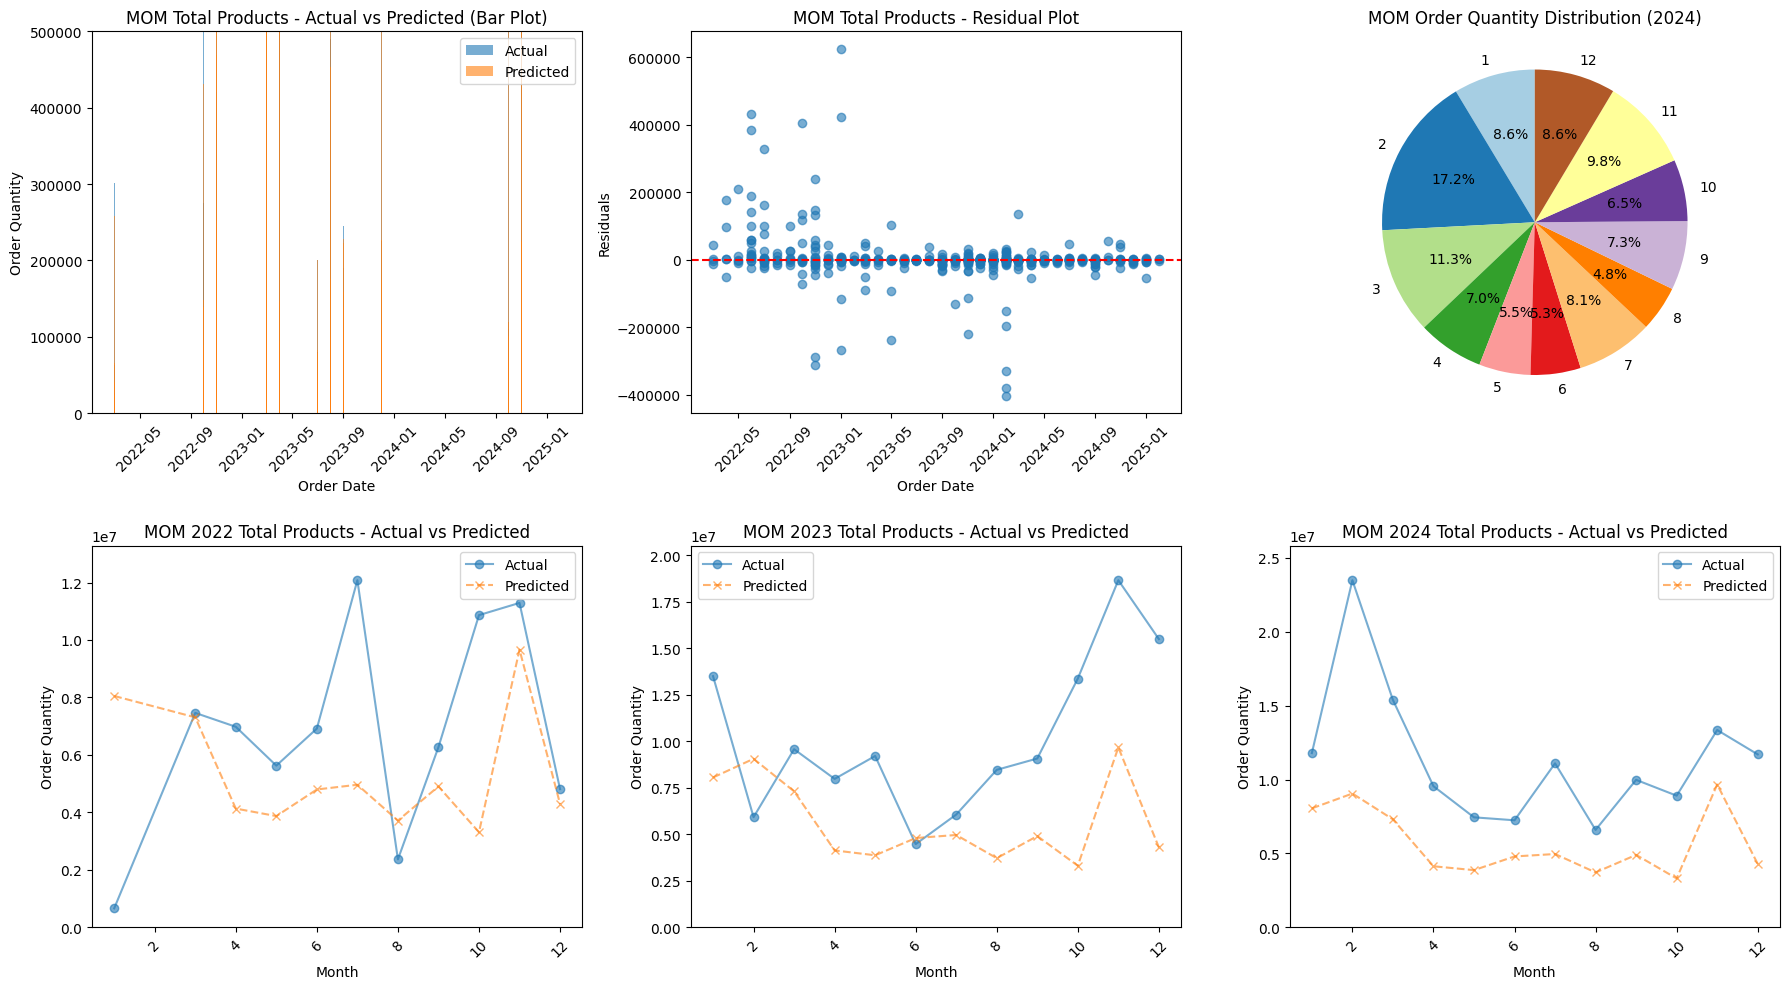

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust layout for better spacing

# Bar plot: Actual vs. Predicted Order Quantity
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_val, label='Actual', alpha=0.6)
axes[0, 0].bar(customer_total.loc[total_y_val.index, 'OrderDate'], total_y_pred_rf, label='Predicted', alpha=0.6)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 500_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Residual Plot
residuals = total_y_val - total_y_pred_rf
axes[0, 1].scatter(customer_total.loc[total_y_val.index, 'OrderDate'], residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# Pie Chart: Order Quantity per Month (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024].groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(order_2024, labels=order_2024.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]

    if yearly_df.empty:
        continue  # skip if no data for that year

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert total_y_pred_rf to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_pred_rf, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot actual and predicted values for the year
    axes[1, i].plot(monthly_actual.index, monthly_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
    axes[1, i].plot(monthly_predicted.index, monthly_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')

    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)  # Scale Y axis
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
has_orders_2022 = not customer_total[customer_total['order_year'] == 2022].empty
print(f"Orders in 2022 exist: {has_orders_2022}")


Orders in 2022 exist: True


In [ ]:
customer_total.head(10)

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2656,MOM-TRL-0004Z,2022,1,5,0,0,241.0,126000,110031.53337,110031.53337,...,126000.000000,126000.000000,126000.000000,126000,0,0,-100.0,NaN,0,2022-01-01
2655,MOM-TRL-0003Z,2022,1,5,0,0,241.0,157500,110031.53337,110031.53337,...,157500.000000,157500.000000,157500.000000,157500,0,0,-100.0,NaN,0,2022-01-01
2654,MOM-TRL-0001Z,2022,1,5,0,0,241.0,378000,110031.53337,110031.53337,...,378000.000000,378000.000000,378000.000000,378000,0,0,-100.0,NaN,0,2022-01-01
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,84000.000000,84000.000000,84000.000000,94500,0,0,-100.0,NaN,0,2022-03-01
507,MOM-005-0044Z,2022,3,13,0,0,241.0,27000,18000.00000,18000.00000,...,26166.666667,25285.714286,25285.714286,27000,0,0,-100.0,NaN,25000,2022-03-01
33,MOM-005-0021Z,2022,3,10,2,0,241.0,120000,40000.00000,40000.00000,...,75333.333333,70285.714286,70285.714286,120000,0,0,-100.0,NaN,120000,2022-03-01
460,MOM-005-0042Z,2022,3,13,0,0,241.0,301500,351000.00000,351000.00000,...,144000.000000,165000.000000,149722.222222,301500,0,0,-100.0,NaN,170000,2022-03-01
40,MOM-005-0022Z,2022,3,13,0,0,241.0,301500,207000.00000,207000.00000,...,155300.000000,155300.000000,155300.000000,301500,0,0,-100.0,NaN,0,2022-03-01
446,MOM-005-0041Z,2022,3,13,0,0,241.0,63000,18000.00000,18000.00000,...,66333.333333,47750.000000,46866.666667,63000,0,0,-100.0,NaN,15000,2022-03-01
407,MOM-005-0040Z,2022,3,13,0,0,241.0,63000,72000.00000,72000.00000,...,62250.000000,70958.333333,69277.777778,63000,0,0,-100.0,NaN,100000,2022-03-01


In [ ]:
# from powerbiclient import QuickVisualize, get_dataset_config, Report
# from powerbiclient.authentication import InteractiveLoginAuthentication, DeviceCodeLoginAuthentication
# import pandas as pd

# prod_sales = pd.read_csv(
#     '/Users/mwilko777/Desktop/Project/Software Artifact/datasets/stock_forecasting/final/product_sales.csv')

# # use DeviceCodeLoginAuthentication if want to sign in each time, else InteractiveLoginAuthentication
# auth = InteractiveLoginAuthentication()
# print("Authentication successful.")


# def visual():
#     dataset_config = get_dataset_config(prod_sales)
#     return QuickVisualize(dataset_config, auth)

# visual()

In [ ]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2656,MOM-TRL-0004Z,2022,1,5,0,0,241.0,126000,110031.53337,110031.53337,...,126000.000000,126000.000000,126000.000000,126000,0,0,-100.0,NaN,0,2022-01-01
2655,MOM-TRL-0003Z,2022,1,5,0,0,241.0,157500,110031.53337,110031.53337,...,157500.000000,157500.000000,157500.000000,157500,0,0,-100.0,NaN,0,2022-01-01
2654,MOM-TRL-0001Z,2022,1,5,0,0,241.0,378000,110031.53337,110031.53337,...,378000.000000,378000.000000,378000.000000,378000,0,0,-100.0,NaN,0,2022-01-01
0,MOM-005-0018Z,2022,3,10,2,0,241.0,94500,117000.00000,117000.00000,...,84000.000000,84000.000000,84000.000000,94500,0,0,-100.0,NaN,0,2022-03-01
507,MOM-005-0044Z,2022,3,13,0,0,241.0,27000,18000.00000,18000.00000,...,26166.666667,25285.714286,25285.714286,27000,0,0,-100.0,NaN,25000,2022-03-01


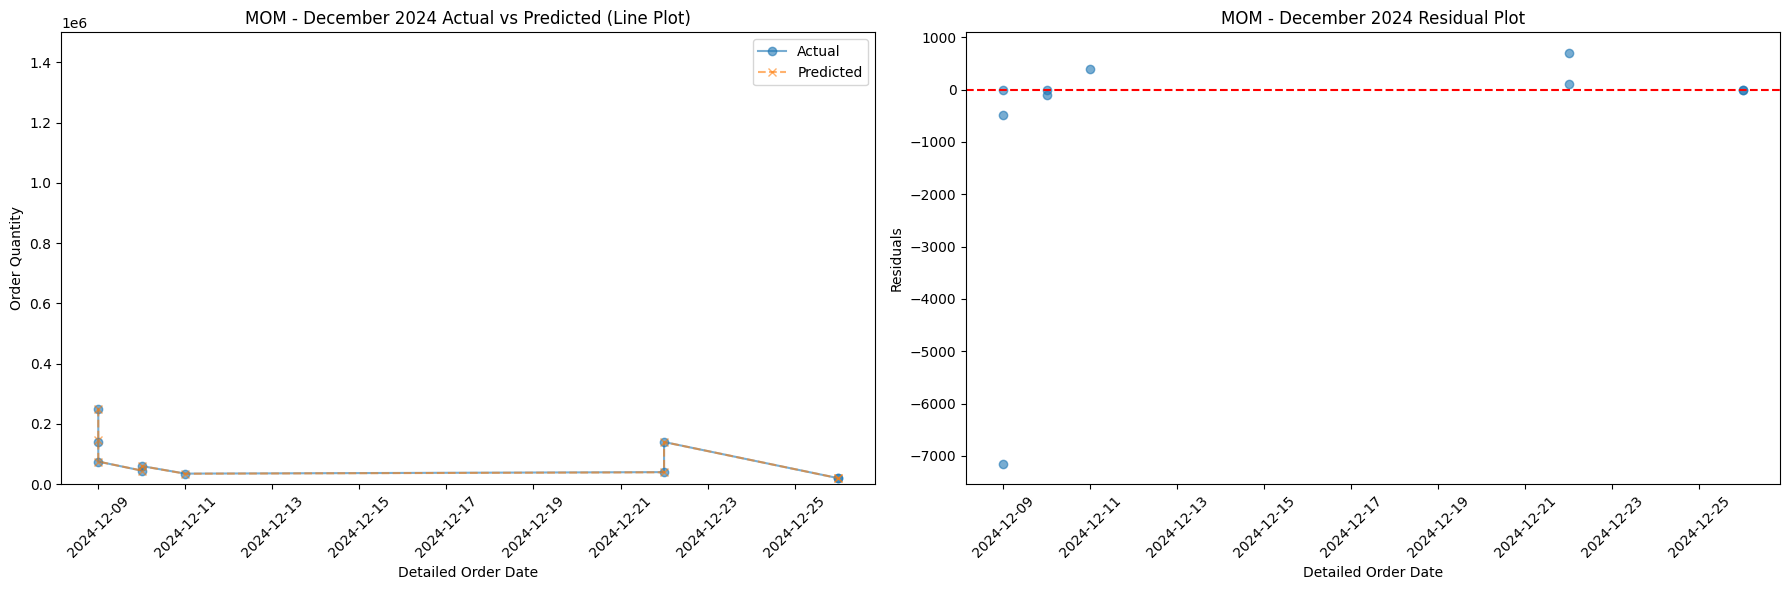

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
customer_total['DetailedOrderDate'] = pd.to_datetime(
    customer_total['order_year'].astype(str) +
    customer_total['order_week'].astype(str).str.zfill(2) +
    customer_total['order_weekday'].astype(str),
    format='%Y%W%w'
)

# Filter the data for December 2024 using DetailedOrderDate
dec_2024_data = customer_total[
    (customer_total['DetailedOrderDate'].dt.year == 2024) &
    (customer_total['DetailedOrderDate'].dt.month == 12)
]

# Use only the common indices between dec_2024_data and y_val
common_index = dec_2024_data.index.intersection(y_val.index)
dec_2024_actual = y_val.loc[common_index]
# Convert y_pred_rf to a Series for indexing (using the same index as y_val)
y_pred_rf_series = pd.Series(y_pred_rf, index=y_val.index)
dec_2024_predicted = y_pred_rf_series.loc[common_index]

# --- Incorporate your provided sorting snippet, adapted for December 2024 data ---
# Here we sort by DetailedOrderDate from dec_2024_data for the common indices.
sorted_indices = dec_2024_data.loc[common_index, 'DetailedOrderDate'].argsort()
sorted_dates = dec_2024_data.loc[common_index, 'DetailedOrderDate'].iloc[sorted_indices]
sorted_actual = dec_2024_actual.iloc[sorted_indices]
sorted_predicted = dec_2024_predicted.iloc[sorted_indices]
# --- End of sorting snippet ---

# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Line Plot: Actual vs. Predicted Order Quantity using DetailedOrderDate
axes[0].plot(sorted_dates, sorted_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
axes[0].plot(sorted_dates, sorted_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')
axes[0].set_xlabel('Detailed Order Date')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title(f'{custom_ref} - December 2024 Actual vs Predicted (Line Plot)')
axes[0].set_ylim(0, 1_500_000)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Residual Plot for December 2024
residuals_dec_2024 = sorted_actual - sorted_predicted
axes[1].scatter(sorted_dates, residuals_dec_2024, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Detailed Order Date')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'{custom_ref} - December 2024 Residual Plot')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


C:\Users\44777\AppData\Local\Temp\ipykernel_1652\4258343104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
metrics = {}

### Random Forest ###
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print('\n' + '='*30 + ' RANDOM FOREST ' + '='*30)
evaluate_model(rf_model, X_train, y_train)
test_metrics = evaluate_model(rf_model, X_val, y_val)
metrics['Random Forest'] = test_metrics

### XGBoost ###
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
}
grid_xgb = GridSearchCV(xgb_model, param_grid, cv=3, 
                      scoring='neg_mean_absolute_error', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

print('\n' + '='*30 + ' XGBOOST ' + '='*30)
evaluate_model(best_xgb, X_train, y_train)
test_metrics = evaluate_model(best_xgb, X_val, y_val)
metrics['XGBoost'] = test_metrics

### Neural Network ###
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

mlp = MLPRegressor(hidden_layer_sizes=(128, 64), learning_rate_init=0.01,
                 max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('\n' + '='*30 + ' NEURAL NETWORK ' + '='*30)
evaluate_model(mlp, X_train_scaled, y_train)
test_metrics = evaluate_model(mlp, X_val_scaled, y_val)
metrics['Neural Network'] = test_metrics

# Convert metrics to DataFrame
metrics_df = pd.DataFrame({k: v for k, v in metrics.items()}).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]
print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


============================== RANDOM FOREST ==============================
Mean Absolute Error (MAE): 7424.9212
Mean Squared Error (MSE): 629306188.9340
Root Mean Squared Error (RMSE): 25085.9759
R-squared (R²): 0.9860
Mean Absolute Error (MAE): 23719.7226
Mean Squared Error (MSE): 5395809671.5170
Root Mean Squared Error (RMSE): 73456.1752
R-squared (R²): 0.8593

============================== XGBOOST ==============================
Mean Absolute Error (MAE): 1142.2461
Mean Squared Error (MSE): 2958708.0000
Root Mean Squared Error (RMSE): 1720.0895
R-squared (R²): 0.9999
Mean Absolute Error (MAE): 16717.8438
Mean Squared Error (MSE): 2227300352.0000
Root Mean Squared Error (RMSE): 47194.2830
R-squared (R²): 0.9419

============================== NEURAL NETWORK ==============================
Mean Absolute Error (MAE): 10050.9581
Mean Squared Error (MSE): 441675799.0630
Root Mean Squared Error (RMSE): 21016.0843
R-squared (R²): 0.9902
Mean Absolute Error (MAE): 10829.0192
Mean Squared E

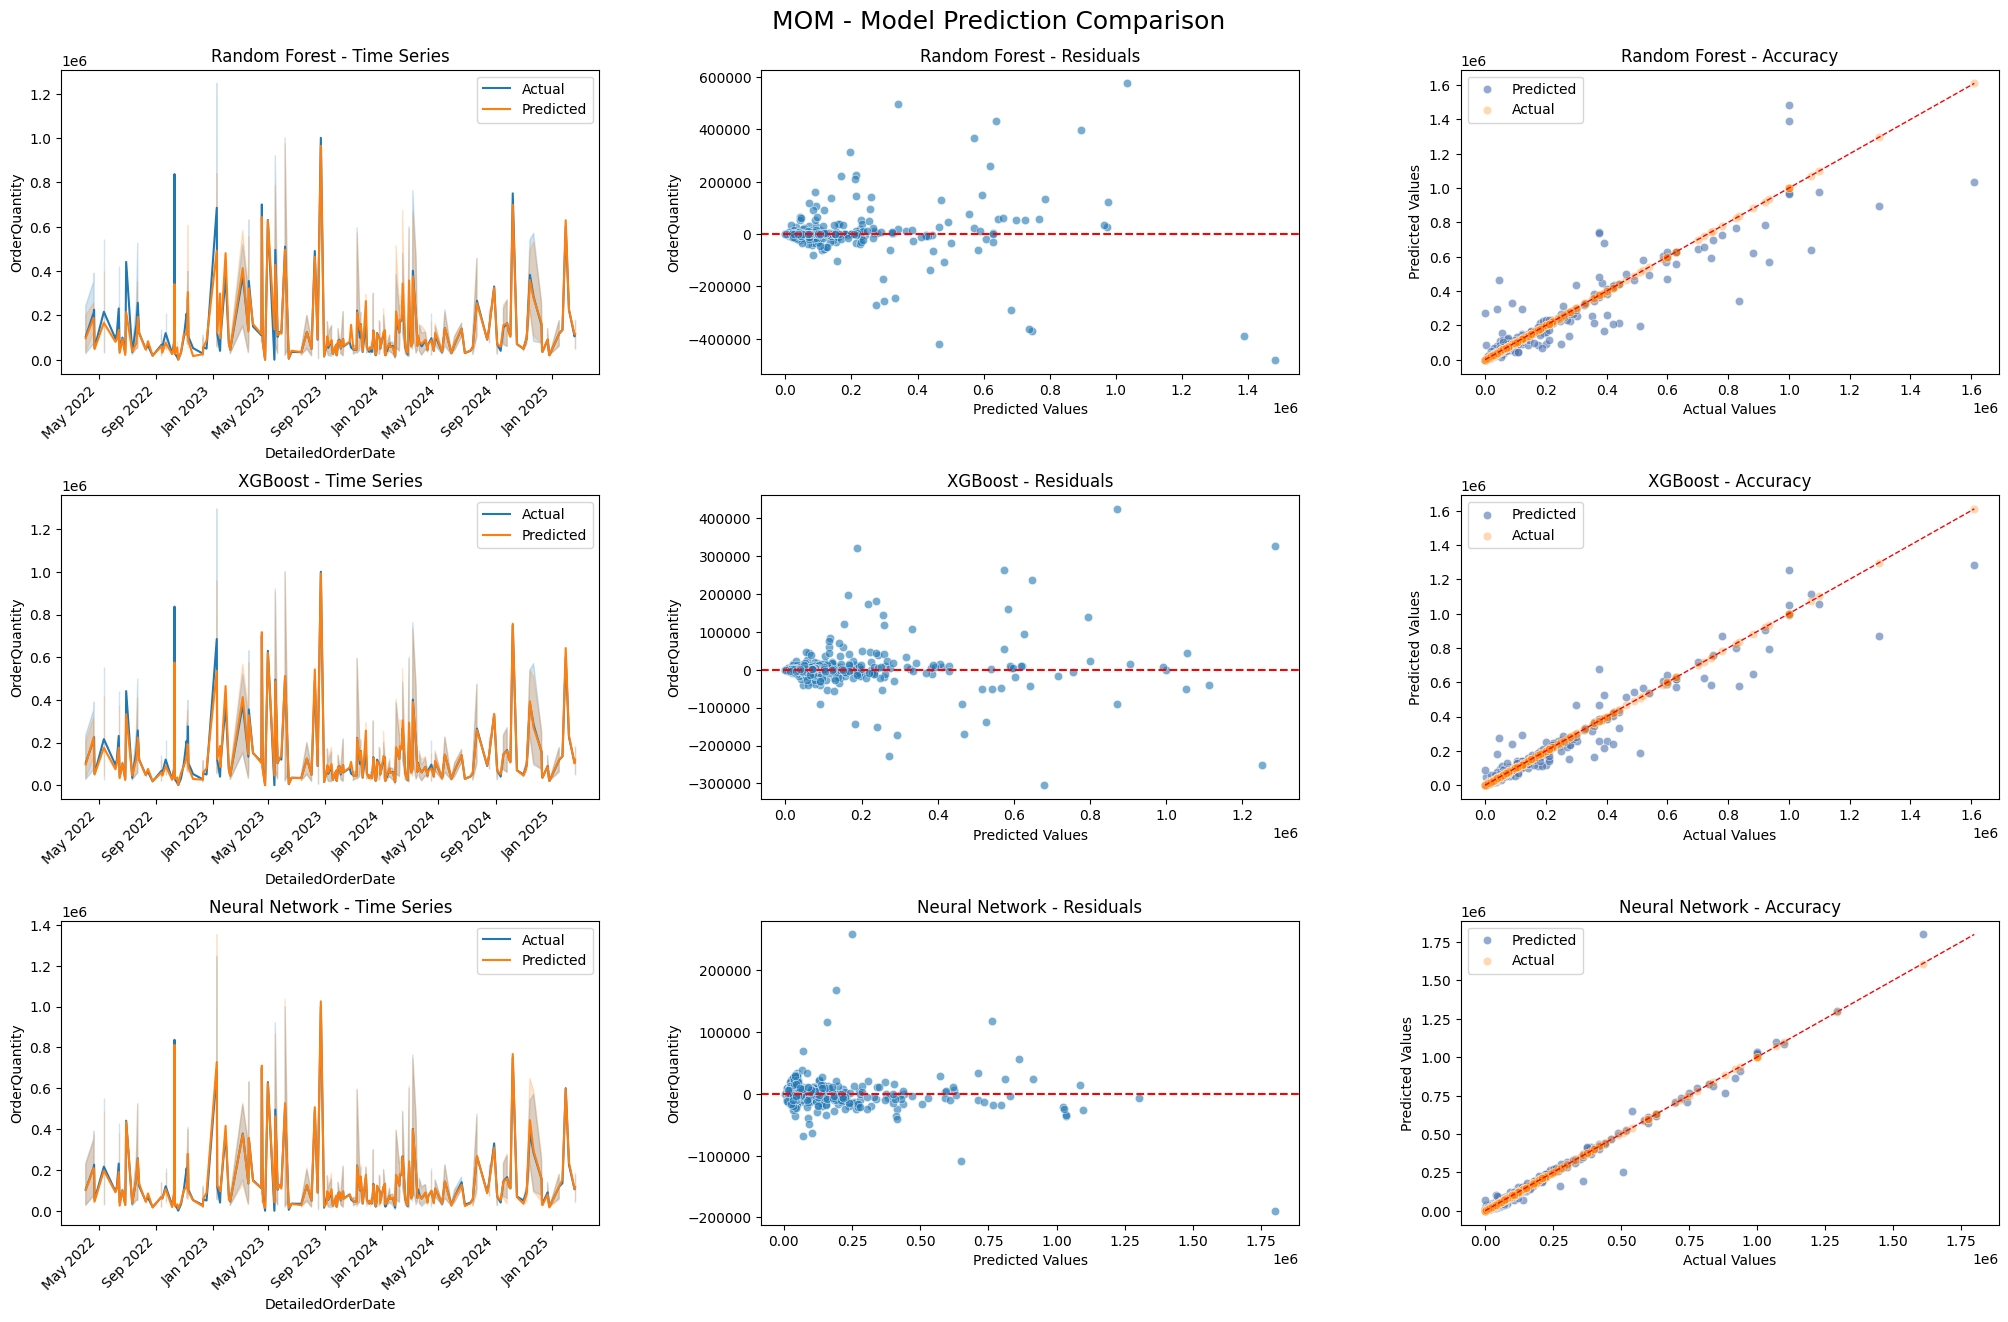

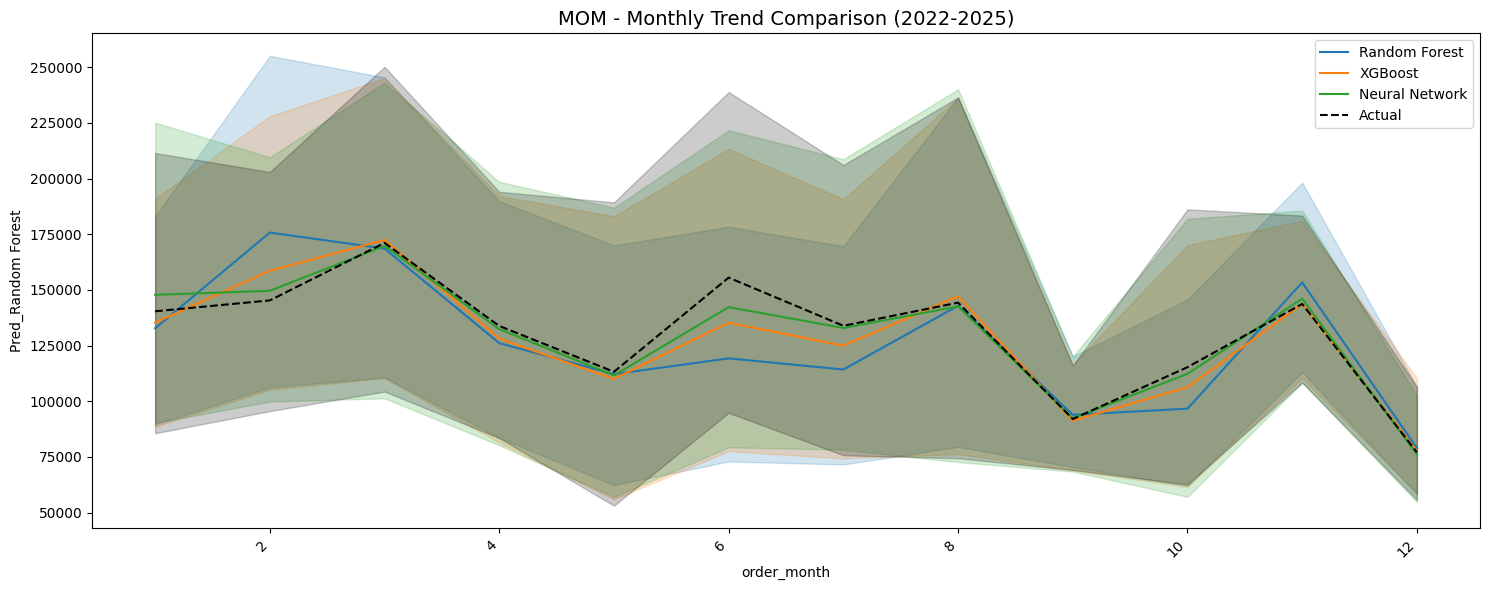

In [ ]:
# Plotting code fix
import matplotlib.dates as mdates
import seaborn as sns

plot_dates = customer_total.loc[y_val.index, 'DetailedOrderDate']  # Changed X to df
if not pd.api.types.is_datetime64_any_dtype(plot_dates):
    plot_dates = pd.to_datetime(plot_dates)

# Create main comparison plots
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
fig.suptitle(f"{custom_ref} - Model Prediction Comparison", 
             fontsize=18, y=0.92)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

models = {
    "Random Forest": rf_model.predict(X_val),
    "XGBoost": best_xgb.predict(X_val),
    "Neural Network": mlp.predict(X_val_scaled)
}

for row, (model_name, y_pred) in enumerate(models.items()):
    # Time Series Comparison
    ax = axes[row, 0]
    sns.lineplot(x=plot_dates, y=y_val, label='Actual', ax=ax)
    sns.lineplot(x=plot_dates, y=y_pred, label='Predicted', ax=ax)
    ax.set_title(f'{model_name} - Time Series', fontsize=12)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Residual Plot
    ax = axes[row, 1]
    residuals = y_val - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_title(f'{model_name} - Residuals', fontsize=12)
    ax.set_xlabel('Predicted Values')
    
    # Actual vs Predicted
    ax = axes[row, 2]
    max_val = max(y_val.max(), y_pred.max())
    
    # Scatter plot with custom colors
    sns.scatterplot(x=y_val, y=y_pred, color='#4C72B0', alpha=0.6, ax=ax, label='Predicted')
    sns.scatterplot(x=y_val, y=y_val, color='#ff8000', alpha=0.3, ax=ax, label='Actual')  # Perfect line as reference
    
    # 1:1 reference line
    ax.plot([0, max_val], [0, max_val], 'r--', linewidth=1)
    
    ax.set_title(f'{model_name} - Accuracy', fontsize=12)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Monthly trend plot fix
fig2, ax2 = plt.subplots(figsize=(15, 6))
monthly_data = df.loc[y_val.index, ['order_month']].copy()  # Changed X to df
monthly_data['Actual'] = y_val.values

for model_name, y_pred in models.items():
    monthly_data[f'Pred_{model_name}'] = y_pred
    sns.lineplot(x='order_month', y=f'Pred_{model_name}', 
                data=monthly_data, label=model_name, ax=ax2)

sns.lineplot(x='order_month', y='Actual', data=monthly_data, 
            label='Actual', ax=ax2, color='black', linestyle='--')
ax2.set_title(f'{custom_ref} - Monthly Trend Comparison (2022-2025)', fontsize=14)
# ax2.xaxis.set_major_locator(mdates.MonthLocator())
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()